In [2]:
import os
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pyfasta
import dask
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")

/home/randomx/anaconda3/envs/pyenv1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
chromosomes = ['3L', '3R', '2L', '2R', 'X']

In [4]:
out_species = ['chri', 'epir']

In [5]:
meta = ag3.sample_metadata(sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
meta = meta[meta.species != 'arabiensis']
di = {"Gambia, The":"Gambia"}
meta = meta.replace({"country": di})
meta["population"] =  meta["country"] + "_" + meta["species"]

In [6]:
meta.population.unique()

array(['Burkina Faso_gambiae', 'Burkina Faso_coluzzii',
       'Burkina Faso_intermediate_gambiae_coluzzii',
       "Cote d'Ivoire_coluzzii", 'Ghana_coluzzii', 'Ghana_gambiae',
       'Gambia_intermediate_gambiae_coluzzii', 'Gambia_gambiae',
       'Gambia_coluzzii', 'Guinea_gambiae',
       'Guinea_intermediate_gambiae_coluzzii', 'Guinea_coluzzii',
       'Mali_gambiae', 'Mali_coluzzii',
       'Mali_intermediate_gambiae_coluzzii', 'Guinea-Bissau_gambiae',
       'Guinea-Bissau_intermediate_gambiae_coluzzii'], dtype=object)

In [7]:
an_col = 'Burkina Faso_coluzzii', "Cote d'Ivoire_coluzzii", 'Ghana_coluzzii', 'Gambia_coluzzii', 'Guinea_coluzzii','Mali_coluzzii',
an_gam = 'Burkina Faso_gambiae', 'Ghana_gambiae', 'Gambia_gambiae','Guinea_gambiae','Mali_gambiae','Guinea-Bissau_gambiae'
an_na = 'Burkina Faso_intermediate_gambiae_coluzzii', 'Gambia_intermediate_gambiae_coluzzii','Guinea_intermediate_gambiae_coluzzii','Mali_intermediate_gambiae_coluzzii', 'Guinea-Bissau_intermediate_gambiae_coluzzii'

----------------------------------------------------------------------------
## Phase3 west biallelic count

In [10]:
grp = meta.groupby("population")
grp_indices = grp.indices

In [11]:
sel = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])

In [38]:
gt = ag3.snp_genotypes("3L", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt

<GenotypeDaskArray shape=(40758473, 1217, 2) dtype=int8>

In [39]:
filter_pass = ag3.site_filters("3L", mask="gamb_colu")
filter_pass

,Array,Chunk
Bytes,40.76 MB,300.00 kB
Shape,"(40758473,)","(300000,)"
Count,137 Tasks,136 Chunks
Type,bool,numpy.ndarray


In [40]:
f = filter_pass[:].compute()
f

array([False, False, False, ..., False, False, False])

In [41]:
pos, ref, alt = ag3.snp_sites("3L")
pos

dask.array<array, shape=(40758473,), dtype=int32, chunksize=(524288,), chunktype=numpy.ndarray>

In [42]:
gt_3L = gt.subset(sel0=f)
gt_3L

<GenotypeDaskArray shape=(28707856, 1217, 2) dtype=int8>

In [43]:
ac_3L = gt_3L.count_alleles_subpops(grp_indices, max_allele=1)

In [44]:
ac_3L['Guinea_gambiae']

<AlleleCountsDaskArray shape=(28707856, 2) dtype=int32>

In [25]:
ac_all_3L

{'Burkina Faso_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Burkina Faso_gambiae': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Burkina Faso_intermediate_gambiae_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 "Cote d'Ivoire_coluzzii": <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Gambia_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Gambia_gambiae': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Gambia_intermediate_gambiae_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Ghana_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Ghana_gambiae': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Guinea-Bissau_gambiae': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Guinea-Bissau_intermediate_gambiae_coluzzii': <AlleleCountsDaskArray shape=(40758473, 2) dtype=int32>,
 'Guinea_coluzzii': <AlleleCountsDaskArray shape=(4075847

In [45]:
gt = ag3.snp_genotypes("3R", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt = gt.subset(sel1 = sel)
filter_pass = ag3.site_filters("3R", mask="gamb_colu")
f = filter_pass[:].compute()
pos, ref, alt = ag3.snp_sites("3R")
gt_3R = gt.subset(sel0=f)
ac_3R = gt_3R.count_alleles_subpops(grp_indices, max_allele=1)

In [46]:
gt = ag3.snp_genotypes("2L", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt = gt.subset(sel1 = sel)
filter_pass = ag3.site_filters("2L", mask="gamb_colu")
f = filter_pass[:].compute()
pos, ref, alt = ag3.snp_sites("2L")
gt_2L = gt.subset(sel0=f)
ac_2L = gt_2L.count_alleles_subpops(grp_indices, max_allele=1)

In [47]:
gt = ag3.snp_genotypes("2R", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt = gt.subset(sel1 = sel)
filter_pass = ag3.site_filters("2R", mask="gamb_colu")
f = filter_pass[:].compute()
pos, ref, alt = ag3.snp_sites("2R")
gt_2R = gt.subset(sel0=f)
ac_2R = gt_2R.count_alleles_subpops(grp_indices, max_allele=1)

In [48]:
gt = ag3.snp_genotypes("X", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt = gt.subset(sel1 = sel)
filter_pass = ag3.site_filters("X", mask="gamb_colu")
f = filter_pass[:].compute()
pos, ref, alt = ag3.snp_sites("X")
gt_X = gt.subset(sel0=f)
ac_X = gt_X.count_alleles_subpops(grp_indices, max_allele=1)

In [49]:
root = zarr.open('phase3_biallel_allele_count.zarr', mode='a')

In [50]:
chrom_2R = root.create_group('2R')
chrom_2L = root.create_group('2L')
chrom_3R = root.create_group('3R')
chrom_3L = root.create_group('3L')
chrom_X = root.create_group('X')

In [51]:
populations  = ['Burkina Faso_gambiae', 'Burkina Faso_coluzzii',
       'Burkina Faso_intermediate_gambiae_coluzzii',
       "Cote d'Ivoire_coluzzii", 'Ghana_coluzzii', 'Ghana_gambiae',
       'Gambia_intermediate_gambiae_coluzzii', 'Gambia_gambiae',
       'Gambia_coluzzii', 'Guinea_gambiae',
       'Guinea_intermediate_gambiae_coluzzii', 'Guinea_coluzzii',
       'Mali_gambiae', 'Mali_coluzzii',
       'Mali_intermediate_gambiae_coluzzii', 'Guinea-Bissau_gambiae',
       'Guinea-Bissau_intermediate_gambiae_coluzzii']

In [52]:
for pop in populations:
    chrom_2R.create_dataset(pop, data=ac_2R[pop].compute())
    chrom_2L.create_dataset(pop, data=ac_2L[pop].compute())
    chrom_3R.create_dataset(pop, data=ac_3R[pop].compute())
    chrom_3L.create_dataset(pop, data=ac_3L[pop].compute())
    chrom_X.create_dataset(pop, data=ac_X[pop].compute())

In [54]:
ac_2R['Burkina Faso_gambiae']

<AlleleCountsDaskArray shape=(44439759, 2) dtype=int32>

In [14]:
calldata_out= zarr.open('outgroup_alleles_phase3.zarr')

-----------------------------------------------------------------------

In [8]:
calldata_biallel= zarr.open('phase3_biallel_allele_count.zarr')

In [9]:
metadata = meta

In [38]:
ac_cache = dict()

def load_ac(chrom, pop):
    if (chrom, pop) in ac_cache:
        return ac_cache[chrom, pop]
    else:
        if pop in out_species:
            ac = calldata_out[chrom][pop][:,:2]
        else:
            ac = calldata_biallel[chrom][pop]
            ac_cache[chrom, pop] = ac
        return ac

In [39]:
fourpop_cache = dict()

----------------------------------------------
## F4 statistics

In [40]:
allel.AlleleCountsChunkedArray(calldata_out['2L']['chri'][:,:2])

<AlleleCountsChunkedArray shape=(36005131, 2) dtype=int32
   nbytes=274.7M
   values=numpy.ndarray>

In [44]:
def f4_analysis(chroms, A, B, C, D, regions=None, blen=100000, plot=False, ax=None):
    
    
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    
    key = (",".join(chroms), region_str, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = dask.array.vstack([load_ac(chrom, A)[region] for chrom, region in zip(chroms, regions)])
        acb = dask.array.vstack([load_ac(chrom, B)[region] for chrom, region in zip(chroms, regions)])
        acc = dask.array.vstack([load_ac(chrom, C)[region] for chrom, region in zip(chroms, regions)])
        acd = dask.array.vstack([load_ac(chrom, D)[region] for chrom, region in zip(chroms, regions)])
            
        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, 
                                                                     blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

def f4_analys(As, Bs, Cs, Ds, chroms=chromosomes, regions=None, blen=100000):
    
    if regions is None:
        regions = [slice(None)] * 4
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(chroms, A, B, C, D, 
                                                             regions=regions, blen=blen)
                            test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [",".join(chroms), test, d, d_se, d_z]
                            tbl += [row]

    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, 
                 tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))
    
def tbl_display(tbl):
        # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, 
                 tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))
    
def tbl_d_plot(table, title):
    # plot
    tbl = etl.wrap(table).sort('test')
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
    
    ## First Plot - Bar Plot
    x = tbl.values('D').array()
    y = np.arange(tbl.nrows())
    ax1.axvline(0, color='r', lw=1)
    xerr = tbl.values('SE').array()
    ax1.errorbar(x, y, xerr=xerr, fmt='o', lw=1, color='k', mew=1, mfc='k')
    ax1.set_yticks(y)
    ylbls = ['%s; Z = %.1f' % (v.test, v.Z) for v in tbl.records()]
    ax1.set_yticklabels(ylbls)
    ax1.yaxis.tick_right()
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax1.set_xlim(-.2,.2)
    ax1.set_ylim(-1, y.size)
    ax1.grid(axis='both', color='#dddddd')
    ax1.set_xlabel("Patterson's $D$ Barplot")
    fig.suptitle('%s' % (title), y=1.02, fontsize=16)

    ## Second plot - Heatmap
    results = etl.todataframe(tbl)
    df1 = results[['test', 'D','Z']].round(2)
    heatmap1_data = pd.pivot_table(df1, values='Z', 
                     index=['test'], 
                     columns='D')
    lm = sns.heatmap(heatmap1_data, cmap="RdBu", vmin=15, vmax=-15, annot=True)
    ax2 = lm.axes
    ax2.set_xlim(-.7)
    ax2.set_ylim(40.4)
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    plt.xticks(rotation=70)
    ax2.set_xlabel("Patterson's $D$ Heatmap")
    ax2.invert_yaxis()
    plt.text(1.02, 0.5, 'Z-score', {'fontsize': 15},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    ax2.grid(False, 'major')
    ax2.grid(True, 'minor')
    ax2.set_yticks([t - 0.5 for t in ax2.get_yticks()], minor=True)
    sns.despine()
    fig.tight_layout()
    plt.show()  

In [45]:
A = an_gam
B = an_na
C = an_col
D = 'chri'

In [46]:
f4_analys(A, B, C, D, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,D,SE,Z
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Burkina Faso_coluzzii, chri)",-0.003,0.0026,-1.0
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Cote d'Ivoire_coluzzii, chri)",-0.003,0.0027,-1.0
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Ghana_coluzzii, chri)",-0.002,0.0027,-0.9
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Gambia_coluzzii, chri)",-0.002,0.0026,-0.9
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Guinea_coluzzii, chri)",-0.003,0.0026,-1.0
"3L,3R","D(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Mali_coluzzii, chri)",-0.002,0.0026,-0.9
"3L,3R","D(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Burkina Faso_coluzzii, chri)",-0.039,0.0026,-15.1
"3L,3R","D(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Cote d'Ivoire_coluzzii, chri)",-0.047,0.0025,-18.6
"3L,3R","D(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Ghana_coluzzii, chri)",-0.043,0.0027,-16.2
"3L,3R","D(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Gambia_coluzzii, chri)",-0.061,0.0031,-20.0


In [47]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [48]:
f4_analys(A, B, C, D, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,D,SE,Z
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Burkina Faso_gambiae, chri)",-0.026,0.0044,-5.8
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Ghana_gambiae, chri)",-0.013,0.0047,-2.8
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Gambia_gambiae, chri)",0.023,0.0034,6.9
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Guinea_gambiae, chri)",-0.024,0.0044,-5.6
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Mali_gambiae, chri)",-0.020,0.0041,-4.9
"3L,3R","D(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii; Guinea-Bissau_gambiae, chri)",0.018,0.0033,5.5
"3L,3R","D(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii; Burkina Faso_gambiae, chri)",0.012,0.0011,11.1
"3L,3R","D(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii; Ghana_gambiae, chri)",0.011,0.0011,9.5
"3L,3R","D(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii; Gambia_gambiae, chri)",-0.016,0.0012,-12.8
"3L,3R","D(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii; Guinea_gambiae, chri)",0.012,0.0011,10.7


-----------------------------------------
## f3 Statistics

In [60]:
def f4_analysis(chroms, A, B, C, regions=None, blen=100000, plot=False, ax=None):
    
    
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    
    key = (",".join(chroms), region_str, A, B, C, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = dask.array.vstack([load_ac(chrom, A)[region] for chrom, region in zip(chroms, regions)])
        acb = dask.array.vstack([load_ac(chrom, B)[region] for chrom, region in zip(chroms, regions)])
        acc = dask.array.vstack([load_ac(chrom, C)[region] for chrom, region in zip(chroms, regions)])
            
        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.average_patterson_f3(aca, acb, acc, 
                                                                     blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

def f4_analys(As, Bs, Cs, chroms=chromosomes, regions=None, blen=100000):
    
    if regions is None:
        regions = [slice(None)] * 4
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]

    # setup output table
    tbl = [['chromosome', 'test', 'f3', 'SE', 'Z']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                        if B != C:
                            d, d_se, d_z, _, _ = f4_analysis(chroms, A, B, C,  
                                                             regions=regions, blen=blen)
                            test = 'f3(%s, %s; %s)' % (A, B, C)
                            row = [",".join(chroms), test, d, d_se, d_z]
                            tbl += [row]

    # display results
    (etl
     .wrap(tbl)
     .interpolate('f3', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, 
                 tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))
    return tbl


def tbl_d_plot(table, title):
    # plot
    tbl = etl.wrap(table).sort('test')
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
    
    ## First Plot - Bar Plot
    x = tbl.values('f3').array()
    y = np.arange(tbl.nrows())
    ax1.axvline(0, color='r', lw=1)
    xerr = tbl.values('SE').array()
    ax1.errorbar(x, y, xerr=xerr, fmt='o', lw=1, color='k', mew=1, mfc='k')
    ax1.set_yticks(y)
    ylbls = ['%s; Z = %.1f' % (v.test, v.Z) for v in tbl.records()]
    ax1.set_yticklabels(ylbls)
    ax1.yaxis.tick_right()
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax1.set_xlim(-.2,.2)
    ax1.set_ylim(-1, y.size)
    ax1.grid(axis='both', color='#dddddd')
    ax1.set_xlabel("F3 Statistics Barplot")
    fig.suptitle('%s' % (title), y=1.02, fontsize=16)

    ## Second plot - Heatmap
    results = etl.todataframe(tbl)
    df1 = results[['test', 'f3','Z']].round(2)
    heatmap1_data = pd.pivot_table(df1, values='Z', 
                     index=['test'], 
                     columns='f3')
    lm = sns.heatmap(heatmap1_data, cmap="RdBu", vmin=15, vmax=-15, annot=True)
    ax2 = lm.axes
    ax2.set_xlim(-.7)
    ax2.set_ylim(40.4)
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    plt.xticks(rotation=70)
    ax2.set_xlabel("F3 Statistics Heatmap")
    ax2.invert_yaxis()
    plt.text(1.02, 0.5, 'Z-score', {'fontsize': 15},
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90,
             clip_on=False,
             transform=plt.gca().transAxes)

    ax2.grid(False, 'major')
    ax2.grid(True, 'minor')
    ax2.set_yticks([t - 0.5 for t in ax2.get_yticks()], minor=True)
    sns.despine()
    fig.tight_layout()
    plt.show()  

In [61]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [62]:
A = an_gam
B = an_na
C = an_col

In [63]:
f3_test_1 = f4_analys(A, B, C, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,f3,SE,Z
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Burkina Faso_coluzzii)",-0.001,0.0004,-2.8
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Cote d'Ivoire_coluzzii)",-0.001,0.0004,-2.5
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Ghana_coluzzii)",-0.001,0.0004,-2.8
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Gambia_coluzzii)",-0.001,0.0004,-2.7
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Guinea_coluzzii)",-0.001,0.0004,-2.4
"3L,3R","f3(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii; Mali_coluzzii)",-0.001,0.0004,-3.0
"3L,3R","f3(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Burkina Faso_coluzzii)",0.024,0.0016,14.7
"3L,3R","f3(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Cote d'Ivoire_coluzzii)",0.026,0.0016,16.2
"3L,3R","f3(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Ghana_coluzzii)",0.025,0.0016,15.0
"3L,3R","f3(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii; Gambia_coluzzii)",0.031,0.0018,16.9


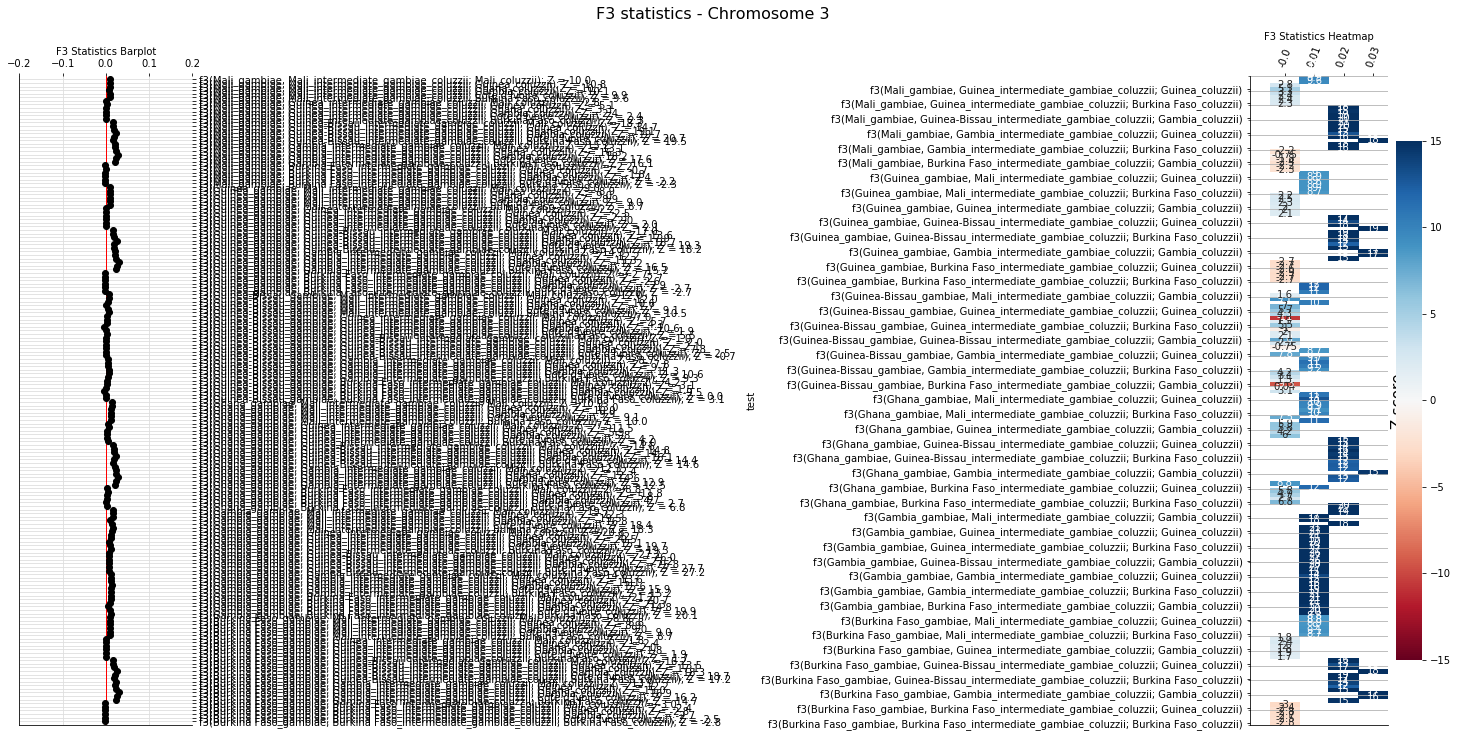

In [69]:
tbl_d_plot(f3_test_1, 'F3 statistics - Chromosome 3')

-------------------------------
## Fst

In [71]:
def f4_analysis(chroms, A, B, regions=None, blen=100000, plot=False, ax=None):
    
    
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    
    key = (",".join(chroms), region_str, A, B, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = dask.array.vstack([load_ac(chrom, A)[region] for chrom, region in zip(chroms, regions)])
        acb = dask.array.vstack([load_ac(chrom, B)[region] for chrom, region in zip(chroms, regions)])
            
        # run D test
        d, d_se, d_vb, d_vj = allel.average_hudson_fst(aca, acb, 
                                                                     blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_vb, d_vj
    
    return d, d_se, d_vb, d_vj

def f4_analys(As, Bs, chroms=chromosomes, regions=None, blen=100000):
    
    if regions is None:
        regions = [slice(None)] * 4
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]

    # setup output table
    tbl = [['chromosome', 'test', 'Fst', 'SE']]

    for A in As:
        for B in Bs:
            if A != B:
                            d, d_se, _, _ = f4_analysis(chroms, A, B,  
                                                             regions=regions, blen=blen)
                            test = 'Fst(%s, %s)' % (A, B)
                            row = [",".join(chroms), test, d, d_se]
                            tbl += [row]

    # display results
    (etl
     .wrap(tbl)
     .interpolate('Fst', '%.3f')
     .interpolate('SE', '%.4f')
     .displayall(index_header=False))
    return tbl

In [72]:
A = an_col
B = an_na

In [73]:
f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)",0.015,0.0027
"3L,3R","Fst(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii)",0.010,0.0007
"3L,3R","Fst(Burkina Faso_coluzzii, Guinea_intermediate_gambiae_coluzzii)",0.024,0.0017
"3L,3R","Fst(Burkina Faso_coluzzii, Mali_intermediate_gambiae_coluzzii)",0.006,0.0009
"3L,3R","Fst(Burkina Faso_coluzzii, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.018,0.0013
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)",0.024,0.0026
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Gambia_intermediate_gambiae_coluzzii)",0.016,0.0006
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Guinea_intermediate_gambiae_coluzzii)",0.033,0.0016
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Mali_intermediate_gambiae_coluzzii)",0.016,0.0009
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.023,0.0011


[['chromosome', 'test', 'Fst', 'SE'],
 ['3L,3R',
  'Fst(Burkina Faso_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)',
  0.0146809785226249,
  0.0026550829673518263],
 ['3L,3R',
  'Fst(Burkina Faso_coluzzii, Gambia_intermediate_gambiae_coluzzii)',
  0.010401495658025136,
  0.0006944490193248235],
 ['3L,3R',
  'Fst(Burkina Faso_coluzzii, Guinea_intermediate_gambiae_coluzzii)',
  0.02382418650417645,
  0.0016936777482213972],
 ['3L,3R',
  'Fst(Burkina Faso_coluzzii, Mali_intermediate_gambiae_coluzzii)',
  0.006161479706169533,
  0.0008820225350553312],
 ['3L,3R',
  'Fst(Burkina Faso_coluzzii, Guinea-Bissau_intermediate_gambiae_coluzzii)',
  0.017561698154806557,
  0.0013108275789963304],
 ['3L,3R',
  "Fst(Cote d'Ivoire_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)",
  0.023511149628339747,
  0.0025513313478540112],
 ['3L,3R',
  "Fst(Cote d'Ivoire_coluzzii, Gambia_intermediate_gambiae_coluzzii)",
  0.01573101360195211,
  0.0005701970759804882],
 ['3L,3R',
  "Fst(Cote d'Ivoir

In [74]:
A = an_gam
B = an_na

In [75]:
fst = f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_gambiae, Burkina Faso_intermediate_gambiae_coluzzii)",-0.012,0.0017
"3L,3R","Fst(Burkina Faso_gambiae, Gambia_intermediate_gambiae_coluzzii)",0.028,0.0016
"3L,3R","Fst(Burkina Faso_gambiae, Guinea_intermediate_gambiae_coluzzii)",0.001,0.0005
"3L,3R","Fst(Burkina Faso_gambiae, Mali_intermediate_gambiae_coluzzii)",0.000,0.0008
"3L,3R","Fst(Burkina Faso_gambiae, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.025,0.0013
"3L,3R","Fst(Ghana_gambiae, Burkina Faso_intermediate_gambiae_coluzzii)",-0.005,0.0017
"3L,3R","Fst(Ghana_gambiae, Gambia_intermediate_gambiae_coluzzii)",0.026,0.0017
"3L,3R","Fst(Ghana_gambiae, Guinea_intermediate_gambiae_coluzzii)",0.007,0.0007
"3L,3R","Fst(Ghana_gambiae, Mali_intermediate_gambiae_coluzzii)",0.006,0.0008
"3L,3R","Fst(Ghana_gambiae, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.024,0.0013


In [76]:
A = an_na
B = an_na
fst = f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_intermediate_gambiae_coluzzii, Gambia_intermediate_gambiae_coluzzii)",0.016,0.0022
"3L,3R","Fst(Burkina Faso_intermediate_gambiae_coluzzii, Guinea_intermediate_gambiae_coluzzii)",-0.008,0.0018
"3L,3R","Fst(Burkina Faso_intermediate_gambiae_coluzzii, Mali_intermediate_gambiae_coluzzii)",-0.008,0.0020
"3L,3R","Fst(Burkina Faso_intermediate_gambiae_coluzzii, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.012,0.0020
"3L,3R","Fst(Gambia_intermediate_gambiae_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)",0.016,0.0022
"3L,3R","Fst(Gambia_intermediate_gambiae_coluzzii, Guinea_intermediate_gambiae_coluzzii)",0.025,0.0013
"3L,3R","Fst(Gambia_intermediate_gambiae_coluzzii, Mali_intermediate_gambiae_coluzzii)",0.010,0.0009
"3L,3R","Fst(Gambia_intermediate_gambiae_coluzzii, Guinea-Bissau_intermediate_gambiae_coluzzii)",0.005,0.0004
"3L,3R","Fst(Guinea_intermediate_gambiae_coluzzii, Burkina Faso_intermediate_gambiae_coluzzii)",-0.008,0.0018
"3L,3R","Fst(Guinea_intermediate_gambiae_coluzzii, Gambia_intermediate_gambiae_coluzzii)",0.025,0.0013


In [77]:
A = an_gam
B = an_col
fst = f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_gambiae, Burkina Faso_coluzzii)",0.028,0.0021
"3L,3R","Fst(Burkina Faso_gambiae, Cote d'Ivoire_coluzzii)",0.038,0.0020
"3L,3R","Fst(Burkina Faso_gambiae, Ghana_coluzzii)",0.033,0.0022
"3L,3R","Fst(Burkina Faso_gambiae, Gambia_coluzzii)",0.033,0.0019
"3L,3R","Fst(Burkina Faso_gambiae, Guinea_coluzzii)",0.050,0.0026
"3L,3R","Fst(Burkina Faso_gambiae, Mali_coluzzii)",0.026,0.0021
"3L,3R","Fst(Ghana_gambiae, Burkina Faso_coluzzii)",0.026,0.0023
"3L,3R","Fst(Ghana_gambiae, Cote d'Ivoire_coluzzii)",0.033,0.0022
"3L,3R","Fst(Ghana_gambiae, Ghana_coluzzii)",0.031,0.0024
"3L,3R","Fst(Ghana_gambiae, Gambia_coluzzii)",0.030,0.0021


In [78]:
A = an_gam
B = an_gam
fst = f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_gambiae, Ghana_gambiae)",0.007,0.0004
"3L,3R","Fst(Burkina Faso_gambiae, Gambia_gambiae)",0.029,0.0010
"3L,3R","Fst(Burkina Faso_gambiae, Guinea_gambiae)",0.001,0.0001
"3L,3R","Fst(Burkina Faso_gambiae, Mali_gambiae)",0.002,0.0001
"3L,3R","Fst(Burkina Faso_gambiae, Guinea-Bissau_gambiae)",0.015,0.0008
"3L,3R","Fst(Ghana_gambiae, Burkina Faso_gambiae)",0.007,0.0004
"3L,3R","Fst(Ghana_gambiae, Gambia_gambiae)",0.028,0.0011
"3L,3R","Fst(Ghana_gambiae, Guinea_gambiae)",0.007,0.0003
"3L,3R","Fst(Ghana_gambiae, Mali_gambiae)",0.007,0.0003
"3L,3R","Fst(Ghana_gambiae, Guinea-Bissau_gambiae)",0.016,0.0008


In [79]:
A = an_col
B = an_col
fst = f4_analys(A, B, chroms=("3L", "3R"),
                regions=(slice(18_000_000, 41_000_000), slice(1, 24000000)))

chromosome,test,Fst,SE
"3L,3R","Fst(Burkina Faso_coluzzii, Cote d'Ivoire_coluzzii)",0.010,0.0004
"3L,3R","Fst(Burkina Faso_coluzzii, Ghana_coluzzii)",0.008,0.0003
"3L,3R","Fst(Burkina Faso_coluzzii, Gambia_coluzzii)",0.010,0.0007
"3L,3R","Fst(Burkina Faso_coluzzii, Guinea_coluzzii)",0.034,0.0010
"3L,3R","Fst(Burkina Faso_coluzzii, Mali_coluzzii)",0.000,0.0001
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Burkina Faso_coluzzii)",0.010,0.0004
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Ghana_coluzzii)",0.008,0.0003
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Gambia_coluzzii)",0.015,0.0006
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Guinea_coluzzii)",0.036,0.0008
"3L,3R","Fst(Cote d'Ivoire_coluzzii, Mali_coluzzii)",0.011,0.0003


In [ ]:
def plot_pairwise_fst(rname, chrom, start, stop, mask=True, blen=10000, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()
        sns.despine(ax=ax)
        
    fst, se = compute_pairwise_fst(chrom, start, stop, blen=blen)
    data = scipy.spatial.distance.squareform(fst).copy()
    data[data < 0] = 0
    if mask:
        mask = np.zeros_like(data)
        mask[np.triu_indices_from(mask)] = True
    else:
        mask = None
    
    xtl = list(fst_pops)
    xtl[-1] = ''
    ytl = list(fst_pops)
    ytl[0] = ''
    sns.heatmap(data, ax=ax, vmin=0, cmap='Greys', 
                xticklabels=xtl, yticklabels=ytl, 
                mask=mask, cbar=False, annot=True, fmt='.3f')
    
    ax.tick_params(length=0)
    if rname:
        ax.set_title(rname, fontweight='bold')
    ax.set_xlabel('$F_{ST}$')

----------------------------